In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [2]:
#Aqui a gente tá pegando as imagens para o 'train_dataset' e tratando elas de uma vez
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    'train2',
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (28, 28),
    batch_size = 32
)

Found 13900 files belonging to 8 classes.
Using 11120 files for training.


In [3]:
#Aqui a gente vai pegar para o 'validation_dataset' e tratar tbm
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    'validation2',
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (28, 28),
    batch_size = (32)
)

Found 3192 files belonging to 8 classes.
Using 638 files for validation.


In [4]:
class_names = ['Basofilas', 'Eosínofilas', 'Eritroblasto', 'ig', 'Linfócitos', 'Monócito', 'Neutrófilo', 'Plaquetária']

In [5]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel, )

batch_size = 32 #Quantidade de features (imagens) que serão trazidas por vez para o dataset
epochs = 30 #Número de vezes que passa por todo o dataset
learning_rate = 0.0001 #Taxa de aprendizagem


In [6]:
#Criando a camada de normalização
norm_layer = tf.keras.layers.Rescaling(1./255)

normalized_train_dataset = train_images.map(lambda x, y: (norm_layer(x), y))
normalized_validation_dataset = validation_images.map(lambda x, y: (norm_layer(x), y))


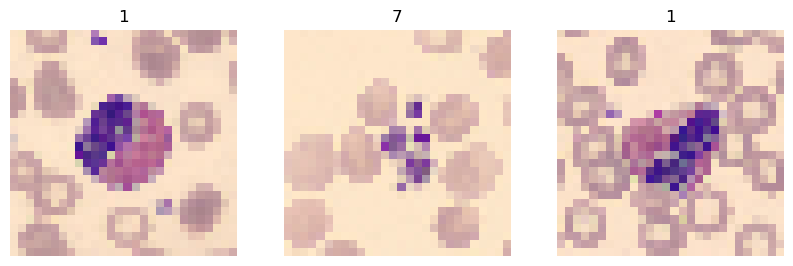

In [7]:
#Iterar sobre o dataset e visualizar uma imagem
for images, labels in normalized_train_dataset.take(1):
    plt.figure(figsize = (10, 10))
    for i in range(3):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()

In [8]:
model = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(28, 28, 3)), #3 para imagens coloridas
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    normalized_train_dataset,
    validation_data = normalized_validation_dataset,
    epochs = epochs
)

Epoch 1/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3345 - loss: 1.7483 - val_accuracy: 0.6270 - val_loss: 0.9219
Epoch 2/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6779 - loss: 0.8845 - val_accuracy: 0.6787 - val_loss: 0.7605
Epoch 3/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7369 - loss: 0.7368 - val_accuracy: 0.7132 - val_loss: 0.6688
Epoch 4/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7770 - loss: 0.6326 - val_accuracy: 0.7226 - val_loss: 0.6905
Epoch 5/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8033 - loss: 0.5551 - val_accuracy: 0.7257 - val_loss: 0.6694
Epoch 6/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8223 - loss: 0.5214 - val_accuracy: 0.7539 - val_loss: 0.6156
Epoch 7/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8390 - loss: 0.4619 - val_accuracy: 0.7743 - val_loss: 0.5373
Epoch 8/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8531 - loss: 0.4246 - val_accu

In [11]:
def plot_model():
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Loss')
    plt.legend (loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, loss, label = 'Training Accuracy')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend (loc = 'lower right')

    plt.show()


<Figure size 640x480 with 0 Axes>

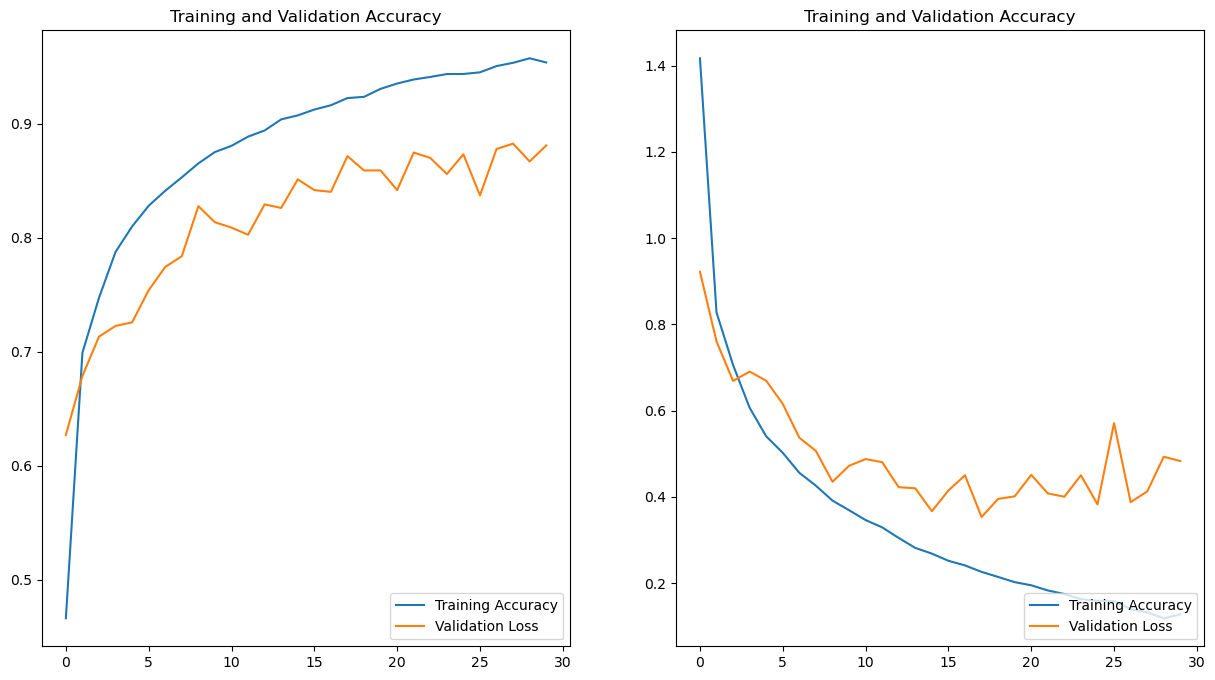

In [12]:
plot_model()

In [13]:
def plot_dataset_predictions(dataset):
    features, labels = dataset.as_numpy_iterator().next()

    features, predictions = dataset.as_numpy_iterator().next()
#    predictions = model.predict_on_batch(features).flatten()
#    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:     %s' % labels)
    print('Pedictions: %s' % predictions)

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])


Labels:     [7 2 7 7 6 5 6 6 6 0 2 0 0 2 3 2 3 3 2 6 3 6 7 5 3 4 4 3 1 6 3 1]
Pedictions: [3 0 2 6 4 6 3 6 0 2 7 1 6 3 0 1 3 6 6 1 3 6 3 6 6 6 5 3 2 7 4 5]


<Figure size 640x480 with 0 Axes>

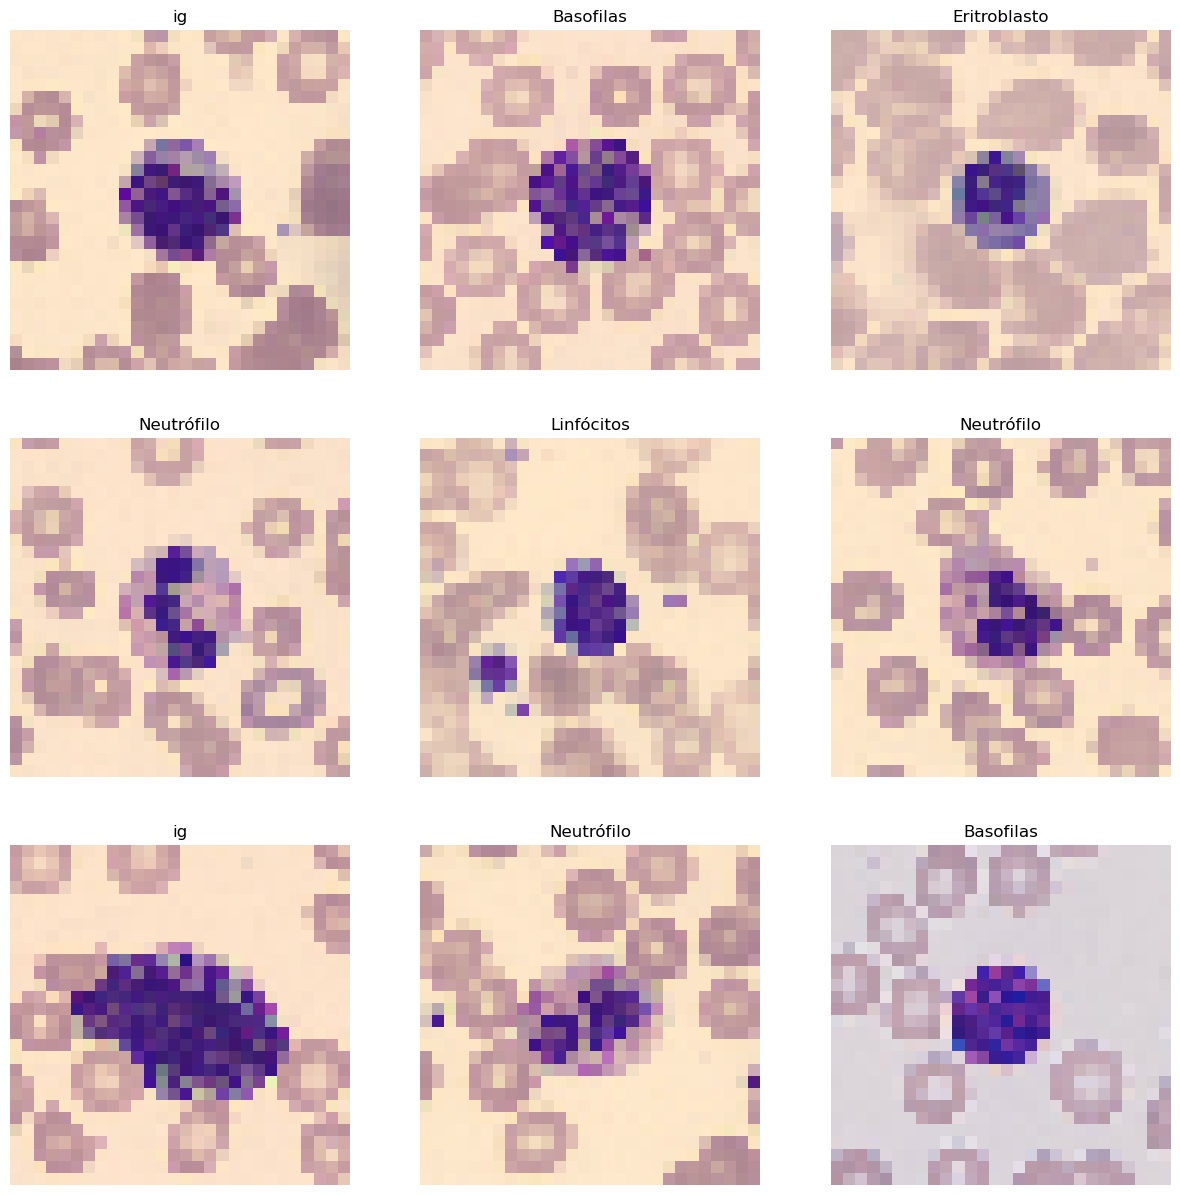

In [14]:
plot_dataset_predictions(validation_images)

In [15]:
model.save('path/to/model.h5')

In [16]:
model = tf.keras.models.load_model('path/to/model.h5')